10가지 사물의 이미지가 있는 CIFAR-10 데이터를 학습하고 그 종류를 판단하는 모델을 모두 연결된 층을 사용하여 만들어 봅시다. 학습과 검증 데이터셋을 내려받고 조사를 해봅시다. 그림 샘플 하나는 3차원이므로 컬러 이미지인것을 알 수 있습니다.

Using TensorFlow backend.


train_images <class 'numpy.ndarray'> (50000, 32, 32, 3) uint8
train_labels <class 'numpy.ndarray'> (50000, 1) uint8
test_images <class 'numpy.ndarray'> (10000, 32, 32, 3) uint8
test_labels <class 'numpy.ndarray'> (10000, 1) int32


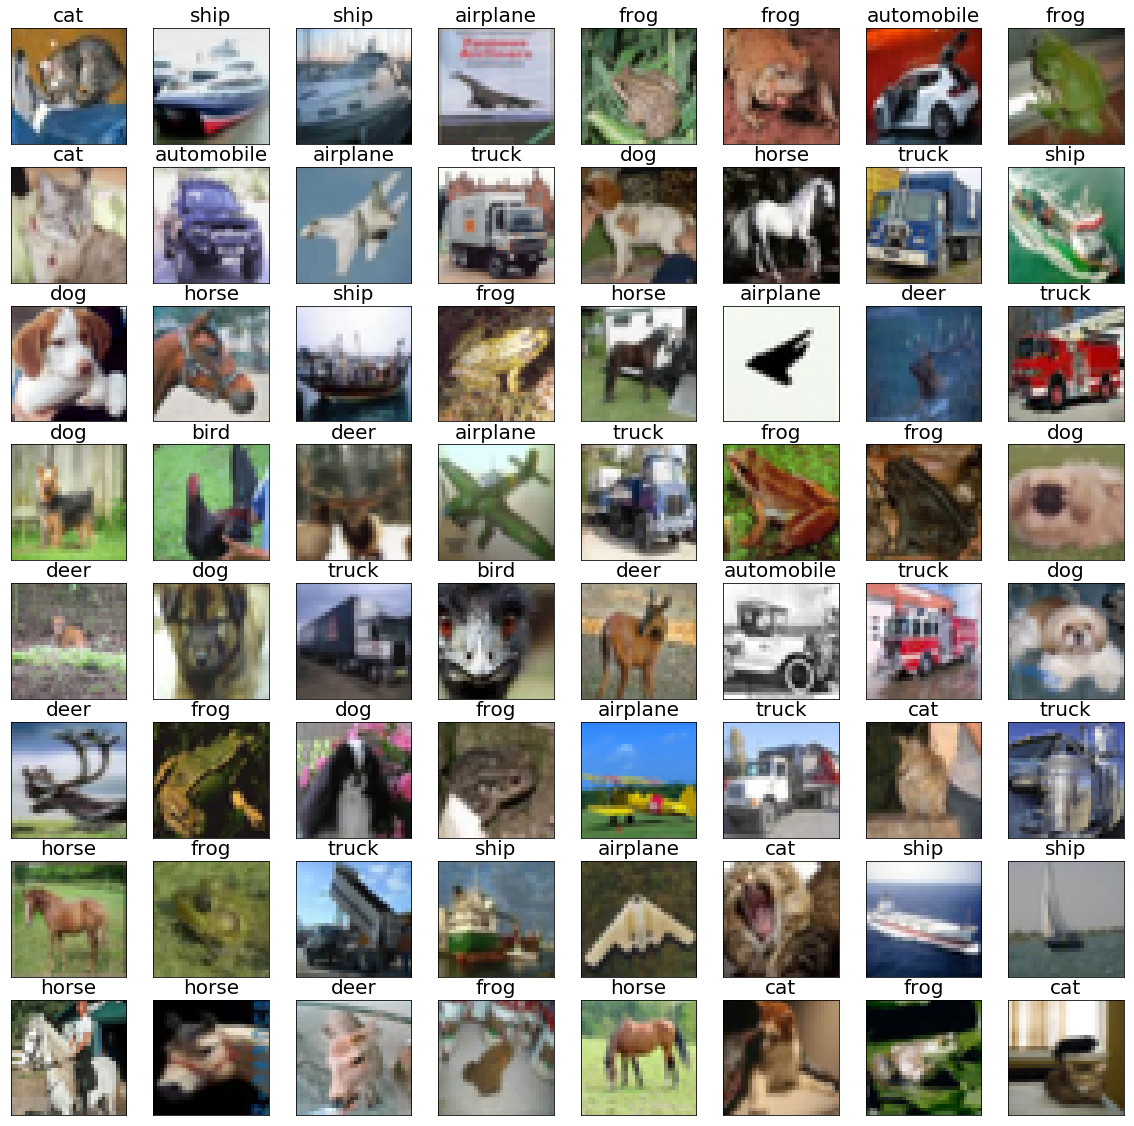

In [1]:
from keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print( 'train_images', type(train_images), train_images.shape, train_images.dtype )
print( 'train_labels', type(train_labels), train_labels.shape, train_labels.dtype )
print( 'test_images', type(test_images), test_images.shape, test_images.dtype )
print( 'test_labels', type(test_labels), test_labels.shape, test_labels.dtype )

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck' ]

plt.figure( figsize=(20,20) )
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( class_names[test_labels[i][0]], {'fontsize':20} )
    plt.imshow( test_images[i] )

다음과 같이 입력 데이터의 전처리를 해줍니다. 2차원 이미지를 1차원 데이터로 만들어 주고 최대값으로 나누어 정규화를 하고 double precision 까지는 필요가 없으므로 float32 자료형으로 변환합니다.

In [2]:
_, h, w, c = train_images.shape
train_x = ( train_images.reshape(-1, h*w*c) / 255 ).astype('float32')
test_x = ( test_images.reshape(-1, h*w*c) / 255 ).astype('float32')
print( 'test_x', type(test_x), test_x.shape, test_x.dtype )

test_x <class 'numpy.ndarray'> (10000, 3072) float32


레이블을 열개의 카테고리를 가진 데이터로 바꾸어 줍니다.

In [3]:
num_classes = 10

print( 'test_labels', test_labels.shape, test_labels.dtype )
print( 'test_labels[0] =', test_labels[0] )

train_y = utils.to_categorical(train_labels, num_classes)
test_y = utils.to_categorical(test_labels, num_classes)

print( 'test_y', test_y.shape, test_y.dtype )
print( 'test_y[0] =', test_y[0] )

test_labels (10000, 1) int32
test_labels[0] = [3]
test_y (10000, 10) float32
test_y[0] = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


순차 모델을 사용해 모두 연결된 중간 층 하나를 가진 모델을 만듭니다. 입력 이미지가 각각 카테고리일 가능성을 출력하기 위해 softmax 활성함수를 사용합니다.

In [4]:
model = models.Sequential()
model.add( layers.Dense(1000, activation='relu', input_shape=(h*w*c,)) )
model.add( layers.Dense(num_classes, activation='softmax') )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


함수 모델을 사용해서 같은 구조의 모델을 만들어봅시다.

In [5]:
x = layers.Input((h*w*c,))
h = layers.Dense(1000, activation='relu')(x)
y = layers.Dense(num_classes, activation='softmax')(h)
model = models.Model(x, y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


softmax를 거친 category 출력에 주로 사용하는 categorical_crossentropy loss 함수를 사용합니다. 학습의 중간 결과로 정확성도 출력하기 위하여 accuracy 라는 측정 항목을 지정해 줍니다.

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 14s 341us/step - loss: 2.5285 - acc: 0.2984 - val_loss: 1.7933 - val_acc: 0.3673
Epoch 2/20
40000/40000 [==============================] - 13s 329us/step - loss: 1.7487 - acc: 0.3810 - val_loss: 1.7587 - val_acc: 0.3835
Epoch 3/20
40000/40000 [==============================] - 13s 331us/step - loss: 1.6646 - acc: 0.4088 - val_loss: 1.7247 - val_acc: 0.3910
Epoch 4/20
40000/40000 [==============================] - 13s 331us/step - loss: 1.6143 - acc: 0.4283 - val_loss: 1.6582 - val_acc: 0.4203
Epoch 5/20
40000/40000 [==============================] - 13s 331us/step - loss: 1.5865 - acc: 0.4381 - val_loss: 1.6867 - val_acc: 0.4037
Epoch 6/20
40000/40000 [==============================] - 13s 329us/step - loss: 1.5459 - acc: 0.4543 - val_loss: 1.5735 - val_acc: 0.4489
Epoch 7/20
40000/40000 [==============================] - 13s 329us/step - loss: 1.5142 - acc: 0.4656 - val_loss: 1.

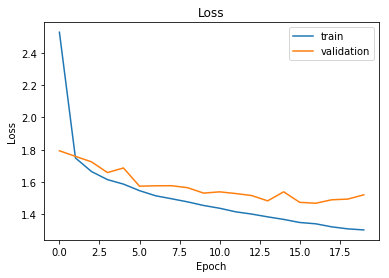

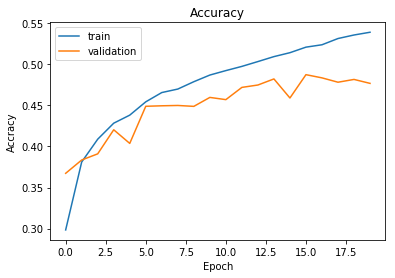

10000/10000 [==============================] - 0s 37us/step
[loss, accuracy] = [1.509217374420166, 0.482]


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

from modules.plot_history import plot_loss, plot_acc
plot_loss(hist, 'Loss')
plt.show()
plot_acc(hist, 'Accuracy')
plt.show()

evaluation = model.evaluate( test_x, test_y, batch_size=128)
print( '[loss, accuracy] =', evaluation )

검증데이터로 모델에 입력을 넣어 어떠한 출력이 나오는지 확인해봅시다.

y_pred (10000, 10) float32
y_pred[0] [8.59808549e-03 7.85591733e-03 7.60289356e-02 5.66129863e-01
 7.10300952e-02 1.26196772e-01 1.07401624e-01 1.94098437e-04
 3.62348072e-02 3.29843082e-04]
class_pred (10000,) int64
class_pred[0] 3


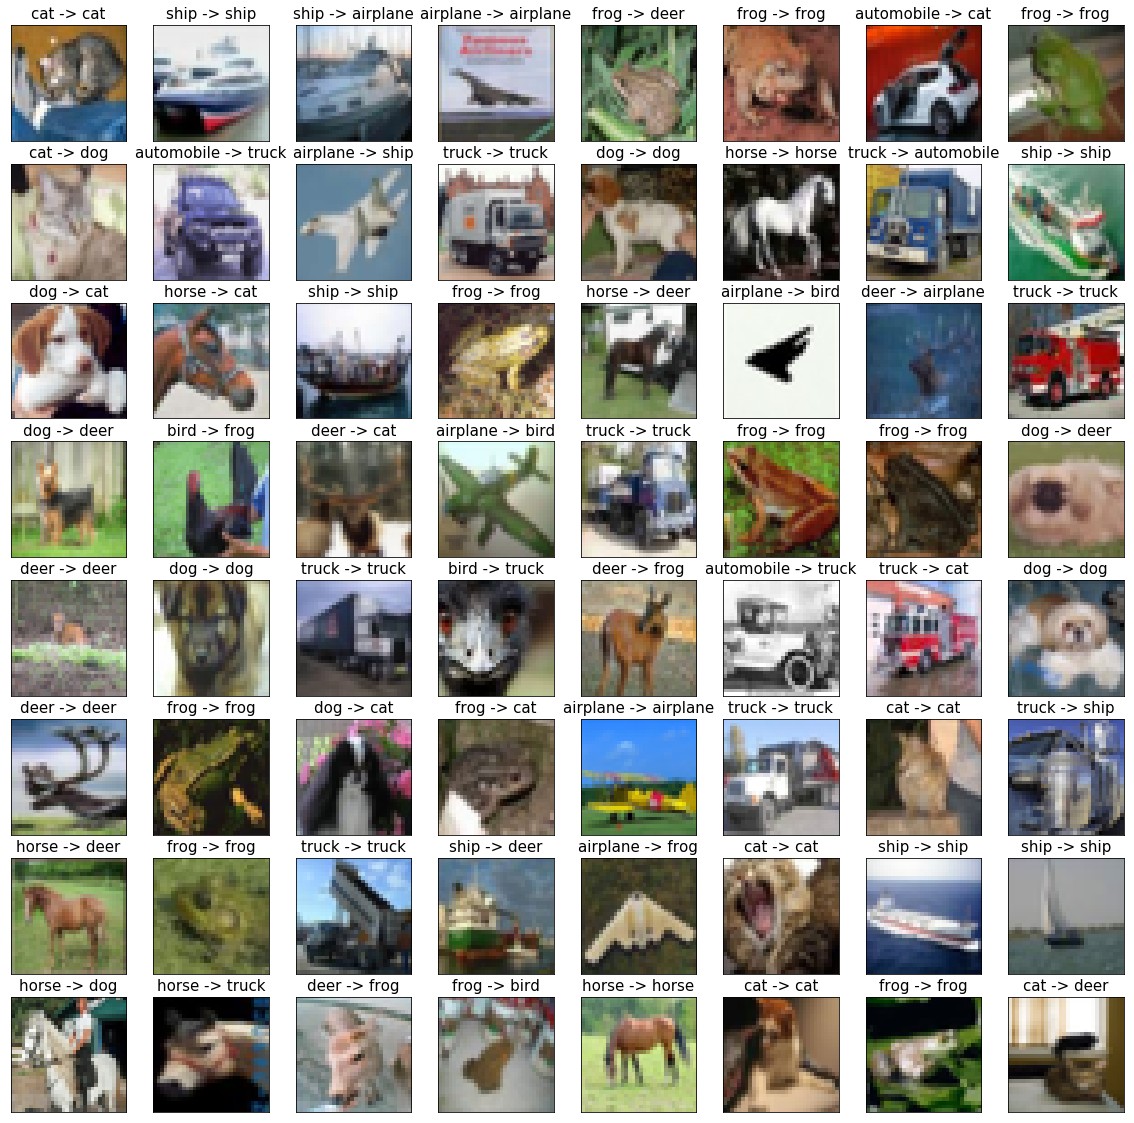

In [7]:
y_pred = model.predict(test_x)
print('y_pred', y_pred.shape, y_pred.dtype)
print('y_pred[0]', y_pred[0])

#class_pred = model.predict_classes( test_x ) # only for sequential model
class_pred = np.argmax(y_pred, axis=1)
print('class_pred', class_pred.shape, class_pred.dtype)
print('class_pred[0]', class_pred[0])

plt.figure( figsize=(20,20) )
for i in range(0,8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[test_labels[i][0]] + ' -> '  +
              class_names[class_pred[i]], {'fontsize':15} )
    plt.imshow( test_images[i] )